In [1]:
from __future__ import print_function
import sys, os
sys.path.append('../../src')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
%matplotlib inline

In [2]:
asset = 'PETR4'
windowMinSize = 3
weightModelWindowMinSize = 6
windowMaxSize = 25
weightModelWindowMaxSize = 150
saveName = '{}_RMSEanalysis_acf_w{}m{}'.format(asset, windowMaxSize, weightModelWindowMaxSize)

saveVarDir = '../Variables'
if not os.path.exists(saveVarDir):
    os.makedirs(saveVarDir)
    print('saveVarDir created')
else:
    print('saveVarDir already exists!')
saveFigDir = '../Figures'
if not os.path.exists(saveFigDir):
    os.makedirs(saveFigDir)
    print('saveFigDir created')
else:
    print('saveFigDir already exists!')

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

saveVarDir already exists!
saveFigDir already exists!


In [3]:
RMSE = joblib.load('{}/{}.pkl'.format(saveVarDir, saveName)) 

In [4]:
minimal = np.Inf
for i in range(windowMinSize, windowMaxSize + 1):
    for j in range(2 * i, weightModelWindowMaxSize + 1):
        if RMSE[i, j] < minimal:
            minimal = RMSE[i][j]
            iMin = i
            jMin = j

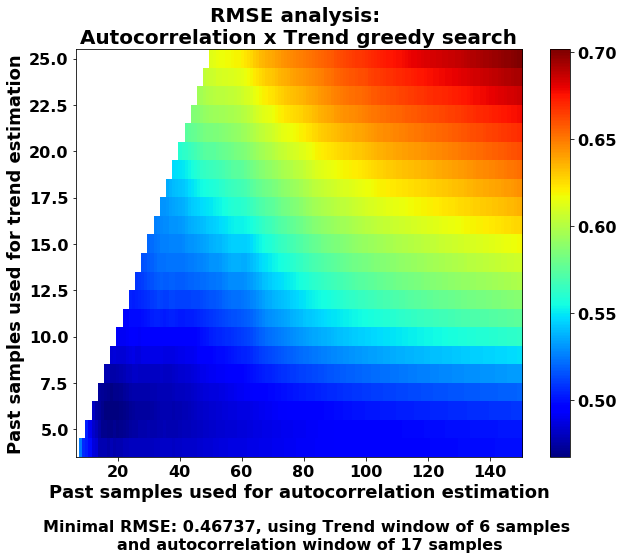

In [5]:
fig, ax = plt.subplots(figsize=(10,7.5))
cax = ax.imshow(RMSE[:,:], cmap="jet", aspect="auto")
plt.gca().invert_yaxis()
ax.set_title('RMSE analysis: \nAutocorrelation x Trend greedy search')
ax.set_ylim([windowMinSize + 0.5, windowMaxSize + 0.5])
ax.set_xlim([weightModelWindowMinSize + 0.5, weightModelWindowMaxSize + 0.5])
ax.set_xlabel('Past samples used for autocorrelation estimation')
ax.set_ylabel('Past samples used for trend estimation')
cbar = fig.colorbar(cax)
plt.figtext(0.45,  -0.045, 'Minimal RMSE: {:.5f}, using Trend window of {} samples \nand autocorrelation window of {} samples'.format(minimal, iMin, jMin), size = 16, horizontalalignment = 'center')

fig.savefig('{}/pdf/{}.{}'.format(saveFigDir, saveName, 'pdf'), bbox_inches='tight')
fig.savefig('{}/png/{}.{}'.format(saveFigDir, saveName, 'png'), bbox_inches='tight')